This notebook follows on from the first notebook in this series *01 Introduction to vectors*. Here we will be looking at matrices, and specifically how they can be considered as operators which perform linear transformations

### Load libraries and setup plotting function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_setup(ax,xlim=[-2,4],ylim=[-2,4],xcoords=[1,0.4],ycoords=[0.4,0.95]): 
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.grid(True,alpha=.3)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(np.arange(xlim[0],xlim[1]+1, 1))
    ax.set_yticks(np.arange(ylim[0], ylim[1]+1, 1))
    ax.set_xlabel('$x_1$',fontsize=12)
    ax.set_ylabel('$x_2$',rotation=0,labelpad=15,fontsize=12)
    ax.xaxis.set_label_coords(xcoords[0],xcoords[1])
    ax.yaxis.set_label_coords(ycoords[0],ycoords[1])
    return ax

### What is a linear transformation?

A linear transformation is effectively a function which maps some input vector into a new output vector of equal dimensions, for example:

\begin{equation}
\tilde{\pmb{x}} = \mathcal{L}(\pmb{x}),
\end{equation}

where $\tilde{}$ denotes a vector which has undergone a linear transformation. In the 2D case, it is useful to think of a transformation as a mapping which takes the input vector from one 2D space to another 2D space, where the output 2D space may be different (e.g., rotated) from the input space. A transformation is said to be 'linear' if both the origin point remains fixed before and after the transformation, and straight lines in the space of vectors remain straight lines (i.e., they do not become curves).

Consider for example some linear transformation of the unit vectors $\pmb{i} =  [1, 0]$ and $\pmb{j} =  [0, 1]$, such that $\tilde{\pmb{i}} =  [1, -2]$ and $\tilde{\pmb{j}} =  [3, 0]$. In the plots below, you can visualise the original 2D space of the input vector as the faint grid lines. The linear transformation then rotates and scales these grid lines (to the new darker grey lines) while keeping them parallel and the origin fixed.

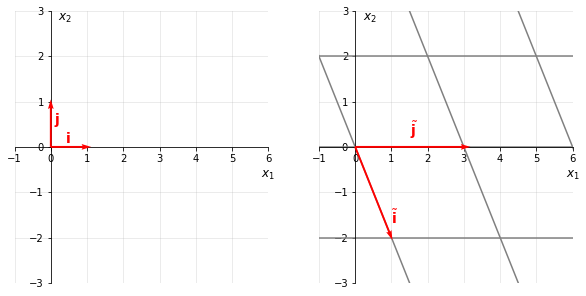

In [146]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,-2])
j_T = np.array([3,0])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,6],[-3,3],xcoords=[1,0.42],ycoords=[0.2,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.85,color='r',zorder=1000)
        ax[c].text(0.1,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.4,0.1,'$\mathbf{i}$',color='r',fontsize=14)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=1.05,color='r',zorder=1000)
        ax[c].text(1.5,0.25,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(1,-1.7,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color=color)

Recall from the first notebook *01 introduction to vectors* how an arbitrary vector $\pmb{x}$ can be described as the linear combination of a set of basis vectors, $\pmb{i}$ and $\pmb{j}$. For example, the vector $\pmb{x} = [x_1,x_2]$ can be written as $\pmb{x} = x_1\pmb{i} + x_2\pmb{j}$. As it turns out, the linear combination which defines this input vector is identical to the linear combination which defines the output vector of a linear transformation. For example, in the case where $\pmb{x} = [2,1]$:

Before transformation: $\pmb{x} = 2\pmb{i} + 1\pmb{j}$

After transformation: $\tilde{\pmb{x}} = 2\tilde{\pmb{i}} + 1\tilde{\pmb{j}}$

Using the example above where the transformed unit vectors are given as $\tilde{\pmb{i}} =  [1, -2]$ and $\tilde{\pmb{j}} =  [3, 0]$, we can therefore compute the coordinates of $\tilde{\pmb{x}}$ as:

\begin{equation}
\tilde{\pmb{x}} = 2\begin{bmatrix} 1 \\ -2 \end{bmatrix} + 1\begin{bmatrix} 3 \\ 0 \end{bmatrix} = \begin{bmatrix} (2\times1) + (1\times3) \\ (2\times-2) + (1\times0) \end{bmatrix} = \begin{bmatrix} 5 \\ -4 \end{bmatrix}
\end{equation}

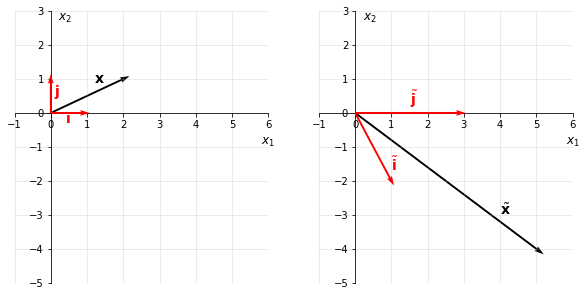

In [147]:
i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,-2])
j_T = np.array([3,0])
x = [2,1]
x_T = [5,-4]

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,6],[-5,3],xcoords=[1,0.54],ycoords=[0.2,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].quiver(0,0,x[0],x[1],units='xy',angles='xy',scale=0.9,color='k')
        ax[c].text(0.1,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.4,-0.3,'$\mathbf{i}$',color='r',fontsize=14)
        ax[c].text(1.2,0.9,'$\mathbf{x}$',color='k',fontsize=14)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,x_T[0],x_T[1],units='xy',angles='xy',scale=0.95,color='k')
        ax[c].text(1.5,0.25,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(1,-1.7,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        ax[c].text(4,-3,r'$\tilde{\mathbf{x}}$',color='k',fontsize=14)
plt.show()

### So what does this all have to do with matrices?

Based on the concepts above, we can write a general expression for the linear transformation of a (2D) vector.

\begin{equation}
\mathcal{L}(\pmb{x}) = x_1\tilde{\pmb{i}} + x_2\tilde{\pmb{j}} = \begin{bmatrix} x_1\tilde{i}_1 + x_2\tilde{j}_1 \\ x_1\tilde{i}_2 + x_2\tilde{j}_2 \end{bmatrix}.
\end{equation}

From this we can see how the linear transformation of any 2D vector can be completely defined by the four numbers which describe $\tilde{\pmb{i}}$ and $\tilde{\pmb{j}}$. It is common to represent these four numbers as a as a 2$\times$2 **matrix**:

\begin{equation}
\begin{bmatrix} \tilde{i}_1 & \tilde{j}_1 \\ \tilde{i}_2 & \tilde{j}_2 \end{bmatrix}.
\end{equation}

Matrices are often thought of as tables, or simply columns of different vectors, but here we can see that they actually contain the information required to describe a particular linear transformation. Therefore when we now see examples of matrix-vector multiplication, like the following: 

\begin{equation}
\pmb{A}\pmb{b} = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}\begin{bmatrix} b_1 \\ b_2 \end{bmatrix} = b_1\begin{bmatrix} a_{11} \\ a_{21} \end{bmatrix} + b_2\begin{bmatrix} a_{12} \\ a_{22} \end{bmatrix} = \begin{bmatrix} a_{11}b_1 + a_{12}b_2 \\ a_{21}b_1 + a_{22}b_2 \end{bmatrix}
\end{equation}

we can visualise this as a linear transformation of the vector $\pmb{b}$, with the matrix $\pmb{A}$ describing the locations of the two basis vectors.

### Some more examples

One example of a useful linear transformation is the *shear* transformation, given by the matrix:

\begin{equation}
\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}
\end{equation}.

We can see this more clearly in the plot below, where the transformed grid lines have been sheared to the right

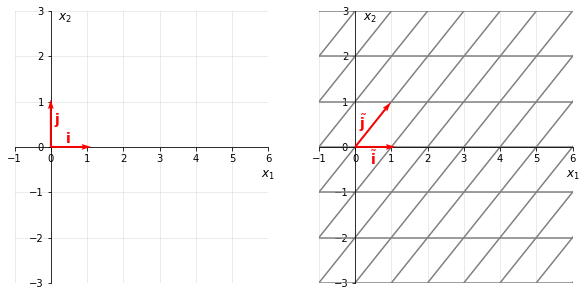

In [164]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,0])
j_T = np.array([1,1])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,6],[-3,3],xcoords=[1,0.42],ycoords=[0.2,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.85,color='r',zorder=1000)
        ax[c].text(0.1,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.4,0.1,'$\mathbf{i}$',color='r',fontsize=14)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=1.0,color='r',zorder=1000)
        ax[c].text(0.1,0.4,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(0.4,-0.4,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color=color)

Additionally, if the linear transformation of $\pmb{i}$ and $\pmb{j}$ result in linearly dependent vectors, such that $\tilde{\pmb{i}} = c\tilde{\pmb{j}}$, then it means that this linear transformation has 'squished' all of 2D space onto the 1D span of these vectors:

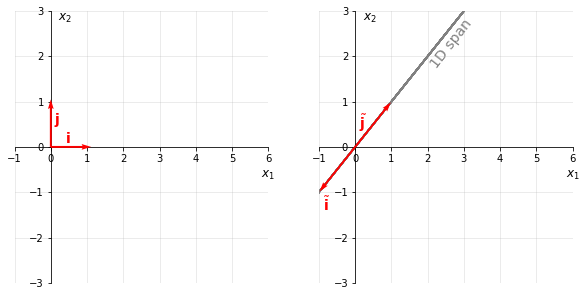

In [180]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    return np.arange(-100,100),np.arange(-100,100)*grad

i = np.array([1,0])
j = np.array([0,1])
i_T = np.array([1,1])
j_T = np.array([-1,-1])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-1,6],[-3,3],xcoords=[1,0.42],ycoords=[0.2,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].quiver(0,0,i[0],i[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j[0],j[1],units='xy',angles='xy',scale=0.85,color='r',zorder=1000)
        ax[c].text(0.1,0.5,'$\mathbf{j}$',color='r',fontsize=14)
        ax[c].text(0.4,0.1,'$\mathbf{i}$',color='r',fontsize=14)
    else:
        ax[c].quiver(0,0,i_T[0],i_T[1],units='xy',angles='xy',scale=1,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T[0],j_T[1],units='xy',angles='xy',scale=1.0,color='r',zorder=1000)
        ax[c].text(0.1,0.4,r'$\tilde{\mathbf{j}}$',color='r',fontsize=14)
        ax[c].text(-0.9,-1.4,r'$\tilde{\mathbf{i}}$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        ax[c].text(2,1.75,'1D span',color=color,fontsize=14,rotation=52)
        tranI = transform_gridlines(i_T)
        tranJ = transform_gridlines(j_T)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T[0]*n,tranI[1]+j_T[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T[0]*n,tranJ[1]+i_T[1]*n,color=color)

### Matrix multiplication

Sometimes we want to apply two consecutive linear transformations. For example we might apply one transformation, given by the matrix:

\begin{equation}
\pmb{M}_1 = \begin{bmatrix} 1 & -2 \\ 1 & 0 \end{bmatrix},
\end{equation}

followed by a second transformation given by:

\begin{equation}
\pmb{M}_2 = \begin{bmatrix} 0 & 2 \\ 1 & 0 \end{bmatrix}.
\end{equation}

We can visualise each of these transformations in the plots below

/var/folders/08/953_5x410x9d826lzpg5fc4h0000gp/T/ipykernel_90959/2820049576.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  grad = vec[1]/vec[0]


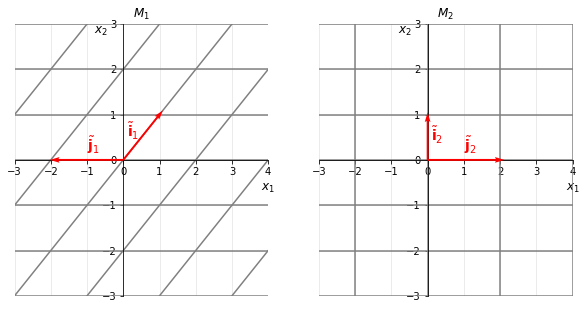

In [229]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i_T1 = np.array([1,1])
j_T1 = np.array([-2,0])
i_T2 = np.array([0,1])
j_T2 = np.array([2,0])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-3,4],[-3,3],xcoords=[1,0.42],ycoords=[0.34,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].set_title('$M_1$')
        ax[c].quiver(0,0,i_T1[0],i_T1[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T1[0],j_T1[1],units='xy',angles='xy',scale=1.1,color='r',zorder=1000)
        ax[c].text(0.1,0.5,r'$\tilde{\mathbf{i}}_1$',color='r',fontsize=14)
        ax[c].text(-1,0.2,r'$\tilde{\mathbf{j}}_1$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T1)
        tranJ = transform_gridlines(j_T1)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T1[0]*n,tranI[1]+j_T1[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T1[0]*n,tranJ[1]+i_T1[1]*n,color=color)
    else:
        ax[c].set_title('$M_2$')
        ax[c].quiver(0,0,i_T2[0],i_T2[1],units='xy',angles='xy',scale=0.85,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T2[0],j_T2[1],units='xy',angles='xy',scale=1.05,color='r',zorder=1000)
        ax[c].text(0.1,0.4,r'$\tilde{\mathbf{i}}_2$',color='r',fontsize=14)
        ax[c].text(1,0.2,r'$\tilde{\mathbf{j}}_2$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T2)
        tranJ = transform_gridlines(j_T2)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T2[0]*n,tranI[1]+j_T2[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T2[0]*n,tranJ[1]+i_T2[1]*n,color=color)

Applying these two transformations to some arbitrary vector $\pmb{x} = [2,1]$ can therefore be written as:

\begin{equation}
\pmb{M}_2\pmb{M}_1\pmb{x} = \begin{bmatrix} 0 & 2 \\ 1 & 0 \end{bmatrix}\bigg(\begin{bmatrix} 1 & -2 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 2 \\ 1 \end{bmatrix}\bigg).
\end{equation}

To find the coordinates of where $\pmb{x}$ ends up after these two transformations requires expanding the above expression one matrix-vector multiplication at a time:

\begin{equation}
\begin{bmatrix} 0 & 1 \\ 2 & 0 \end{bmatrix}\begin{bmatrix}(1 \times 2) + (-2 \times 1) \\ (1 \times 2) + (0 \times 1) \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 2 & 0 \end{bmatrix}\begin{bmatrix}0 \\ 2 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix}.
\end{equation}

You might feel like this is an inefficient way to write this. What if instead we could just write a matrix which describes the locations of the transformed basis vectors after **both** transformations, rather than solving both separately. As it turns out, we can do this by computing the *product* of the two matrices $\pmb{M}_1$ and $\pmb{M}_2$. This product is often referred to as the *composition* of the two independent transformations. Basically, we want to find a solution for the following:

\begin{equation}
\pmb{M} = \pmb{M}_2\pmb{M}_1 = \begin{bmatrix} 0 & 2 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 & -2 \\ 1 & 0 \end{bmatrix} = \begin{bmatrix} ? & ? \\ ? & ? \end{bmatrix}.
\end{equation}

We can solve this by thinking carefully about where our basis vectors land after each transformation. For example, after the first transformation from $\pmb{M}_1$, we know that $\tilde{\pmb{i}} = [1, 1]$ and $\tilde{\pmb{j}} = [-2, 0]$. To find the columns of $\pmb{M}$ we therefore just need to multiply $\pmb{M}_2$ by each new basis vector:

\begin{equation}
\begin{bmatrix} 0 & 2 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}
\end{equation}

\begin{equation}
\begin{bmatrix} 0 & 2 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} -2 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ -2 \end{bmatrix},
\end{equation}

Therefore, 

\begin{equation}
\pmb{M} = \begin{bmatrix} 2 & 0 \\ 1 & -2 \end{bmatrix}.
\end{equation}

We can now double check that that the transformation of our arbitrary vector $\pmb{x}$ still produces the same solution with this new composition matrix:

\begin{equation}
\tilde{\pmb{x}} = \pmb{M}\pmb{x} = \begin{bmatrix} 2 & 0 \\ 1 & -2 \end{bmatrix}\begin{bmatrix} 2 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix}.
\end{equation}

### Commutative

You may often hear that matrix multiplication is not *commutatitve*. What this means is that $\pmb{M}_2\pmb{M}_1 \neq \pmb{M}_1\pmb{M}_2$, and hence the ordering of the matrices matters when we multiply them. By visualising matrix multiplication as linear transformations, it's easy to see why this is the case.

Let's consider the following two transformations, which correspond to a 90 degree anti-clockwise rotation and a shear:

\begin{equation}
\pmb{M}_1 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}, \ \ \ \pmb{M}_2 = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}.
\end{equation}

We can see below that if we first do the rotation and then the shear, the basis vector positions end up at $\tilde{\pmb{i}} = [1,1]$ and $\tilde{\pmb{j}} = [-1,0]$.

/var/folders/08/953_5x410x9d826lzpg5fc4h0000gp/T/ipykernel_90959/2643847068.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  grad = vec[1]/vec[0]


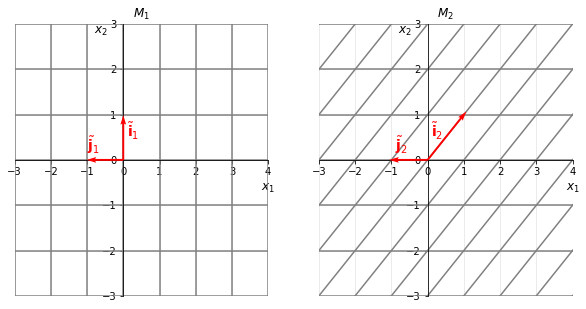

In [252]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i_T1 = np.array([0,1])
j_T1 = np.array([-1,0])
i_T2 = np.array([1,1])
j_T2 = np.array([-1,0])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-3,4],[-3,3],xcoords=[1,0.42],ycoords=[0.34,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].set_title('$M_1$')
        ax[c].quiver(0,0,i_T1[0],i_T1[1],units='xy',angles='xy',scale=0.9,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T1[0],j_T1[1],units='xy',angles='xy',scale=1.1,color='r',zorder=1000)
        ax[c].text(0.1,0.5,r'$\tilde{\mathbf{i}}_1$',color='r',fontsize=14)
        ax[c].text(-1,0.2,r'$\tilde{\mathbf{j}}_1$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T1)
        tranJ = transform_gridlines(j_T1)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T1[0]*n,tranI[1]+j_T1[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T1[0]*n,tranJ[1]+i_T1[1]*n,color=color)
    else:
        ax[c].set_title('$M_2$')
        ax[c].quiver(0,0,i_T2[0],i_T2[1],units='xy',angles='xy',scale=0.92,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T2[0],j_T2[1],units='xy',angles='xy',scale=1.05,color='r',zorder=1000)
        ax[c].text(0.1,0.5,r'$\tilde{\mathbf{i}}_2$',color='r',fontsize=14)
        ax[c].text(-0.9,0.2,r'$\tilde{\mathbf{j}}_2$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T2)
        tranJ = transform_gridlines(j_T2)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T2[0]*n,tranI[1]+j_T2[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T2[0]*n,tranJ[1]+i_T2[1]*n,color=color)

If we instead first do the shear, and then the rotation, we end up at $\tilde{\pmb{i}} = [0,1]$ and $\tilde{\pmb{j}} = [-1,1]$. Therefore we can clearly see that the order matters for matrix multiplication

/var/folders/08/953_5x410x9d826lzpg5fc4h0000gp/T/ipykernel_90959/2406533608.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  grad = vec[1]/vec[0]


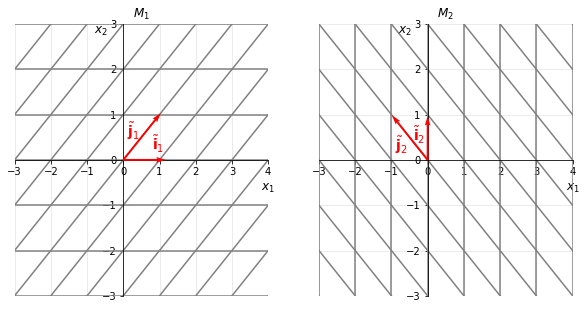

In [256]:
def transform_gridlines(vec):
    grad = vec[1]/vec[0]
    if np.isinf(grad):
        grad = 1
        return np.array([0]*200),np.arange(-100,100)*grad
    else:
        return np.arange(-100,100),np.arange(-100,100)*grad

i_T1 = np.array([1,0])
j_T1 = np.array([1,1])
i_T2 = np.array([0,1])
j_T2 = np.array([-1,1])

fig,ax = plt.subplots(1,2,figsize=(10,5))
for c in range(2):
    ax[c] = plot_setup(ax[c],[-3,4],[-3,3],xcoords=[1,0.42],ycoords=[0.34,0.95])
    ax[c].scatter([0,1],[0,1],color='w')
    
    if c == 0:
        ax[c].set_title('$M_1$')
        ax[c].quiver(0,0,i_T1[0],i_T1[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T1[0],j_T1[1],units='xy',angles='xy',scale=0.95,color='r',zorder=1000)
        ax[c].text(0.1,0.5,r'$\tilde{\mathbf{j}}_1$',color='r',fontsize=14)
        ax[c].text(0.8,0.2,r'$\tilde{\mathbf{i}}_1$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T1)
        tranJ = transform_gridlines(j_T1)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T1[0]*n,tranI[1]+j_T1[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T1[0]*n,tranJ[1]+i_T1[1]*n,color=color)
    else:
        ax[c].set_title('$M_2$')
        ax[c].quiver(0,0,i_T2[0],i_T2[1],units='xy',angles='xy',scale=0.92,color='r',zorder=1000)
        ax[c].quiver(0,0,j_T2[0],j_T2[1],units='xy',angles='xy',scale=1.0,color='r',zorder=1000)
        ax[c].text(-0.4,0.4,r'$\tilde{\mathbf{i}}_2$',color='r',fontsize=14)
        ax[c].text(-0.9,0.2,r'$\tilde{\mathbf{j}}_2$',color='r',fontsize=14)
        color = (0.5,0.5,0.5)
        tranI = transform_gridlines(i_T2)
        tranJ = transform_gridlines(j_T2)
        for n in range(-10,10):
            ax[c].plot(tranI[0]+j_T2[0]*n,tranI[1]+j_T2[1]*n,color=color)
            ax[c].plot(tranJ[0]+i_T2[0]*n,tranJ[1]+i_T2[1]*n,color=color)

### Upcoming...

Now that we have a feel for matrices, the next notebook will introduce the concept of the *determinant*